In [1]:
%pylab ipympl
import os,sys
from multiprocessing import Pool
from tqdm import tqdm
sys.path.insert(0,'/home/user/user/niagara_scratch_sblouin/PyPPM')
from ppmpy import ppm
# turn off matplotlib messages
logging.getLogger("matplotlib").setLevel(logging.CRITICAL)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# the list of variables that are stored within the momsdata cube.
var_list = ['xc','ux','uy','uz','|ut|','|ur|','|w|','P','rho','fv']

In [3]:
data_dir = ['/home/user/user/niagara_scratch_fherwig/','/home/user/user/frontera_scratch3_mao1/',
          '/home/user/user/niagara_scratch_fherwig/','/home/user/user/frontera_scratch3_mao1/']
runs = ['X14','X22','X24','X26']
run_dir = ['X14-1000xL-1000xK-heating-768-mc2400-rin40','X22-1000xL-1000xK-heating-1536-mc2400-rin40',
          'X24-1xL-1xK-heating-768-mc12400-rin40-P0fix-kappamod','X26-1xL-1xK-1536-mc12400'
          ]
dump_select = [300,300,300,300]

In [4]:
rprof = {}
rprofbq = {}
for i,run in enumerate(runs):
    rprof_dir = os.path.join(data_dir[i],run_dir[i],'prfs')
    rprof[run] = ppm.RprofSet(rprof_dir)
    rprofbq[run] = ppm.RprofSet(rprof_dir, bqav=True, var_list=var_list)

420 rprof files found in '/home/user/user/niagara_scratch_fherwig/X14-1000xL-1000xK-heating-768-mc2400-rin40/prfs/.
Dump numbers range from 0 to 419.
420 rprof files found in '/home/user/user/niagara_scratch_fherwig/X14-1000xL-1000xK-heating-768-mc2400-rin40/prfs/frombqavs/.
Dump numbers range from 0 to 419.
483 rprof files found in '/home/user/user/frontera_scratch3_mao1/X22-1000xL-1000xK-heating-1536-mc2400-rin40/prfs/.
Dump numbers range from 0 to 482.
200 rprof files found in '/home/user/user/frontera_scratch3_mao1/X22-1000xL-1000xK-heating-1536-mc2400-rin40/prfs/frombqavs/.
Dump numbers range from 281 to 480.
1291 rprof files found in '/home/user/user/niagara_scratch_fherwig/X24-1xL-1xK-heating-768-mc12400-rin40-P0fix-kappamod/prfs/.
Dump numbers range from 0 to 1290.
881 rprof files found in '/home/user/user/niagara_scratch_fherwig/X24-1xL-1xK-heating-768-mc12400-rin40-P0fix-kappamod/prfs/frombqavs/.
Dump numbers range from 400 to 1280.
516 rprof files found in '/home/user/user/f

In [5]:
cvz_position = []
radius = {}
vorticity = {}
dumps = arange(400,420,1)
for i,run in enumerate(runs):
    for j,dump in enumerate(dumps):
        w_momst, r_moms = rprofbq[run].get('|w|',dump), rprofbq[run].get('xcmax',dump)
        if j==0:
            w_moms = w_momst
        else:
            w_moms += w_momst
    w_moms = w_moms/len(dumps)
    radius[run] = r_moms
    vorticity[run] = w_moms

In [6]:
matplotlib.rcParams.update({'font.size': 12})

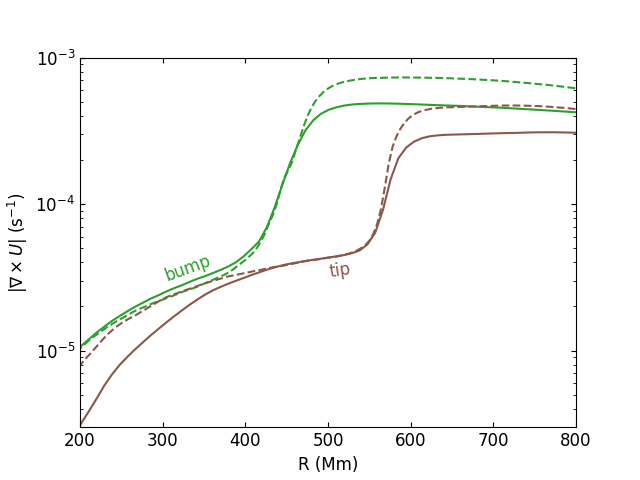

In [7]:
close(2);figure(2)
dump = 400
semilogy(radius['X14'], vorticity['X14'],color='tab:green')
semilogy(radius['X22'], vorticity['X22'],ls='--',color='tab:green')
semilogy(radius['X24'], vorticity['X24'],color='tab:brown')
semilogy(radius['X26'], vorticity['X26'],ls='--',color='tab:brown')
#legend()
xlabel('R (Mm)')
ylabel(r'$| \nabla \times U |$ (s$^{-1}$)')
xlim(200,800)
ylim(3e-6,1e-3)
text(300,3e-5,'bump',rotation=20,color='tab:green')
text(500,3.2e-5,'tip',rotation=8,color='tab:brown')
ax = plt.gca()
ax.tick_params(axis='both',direction='in',which='both')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')